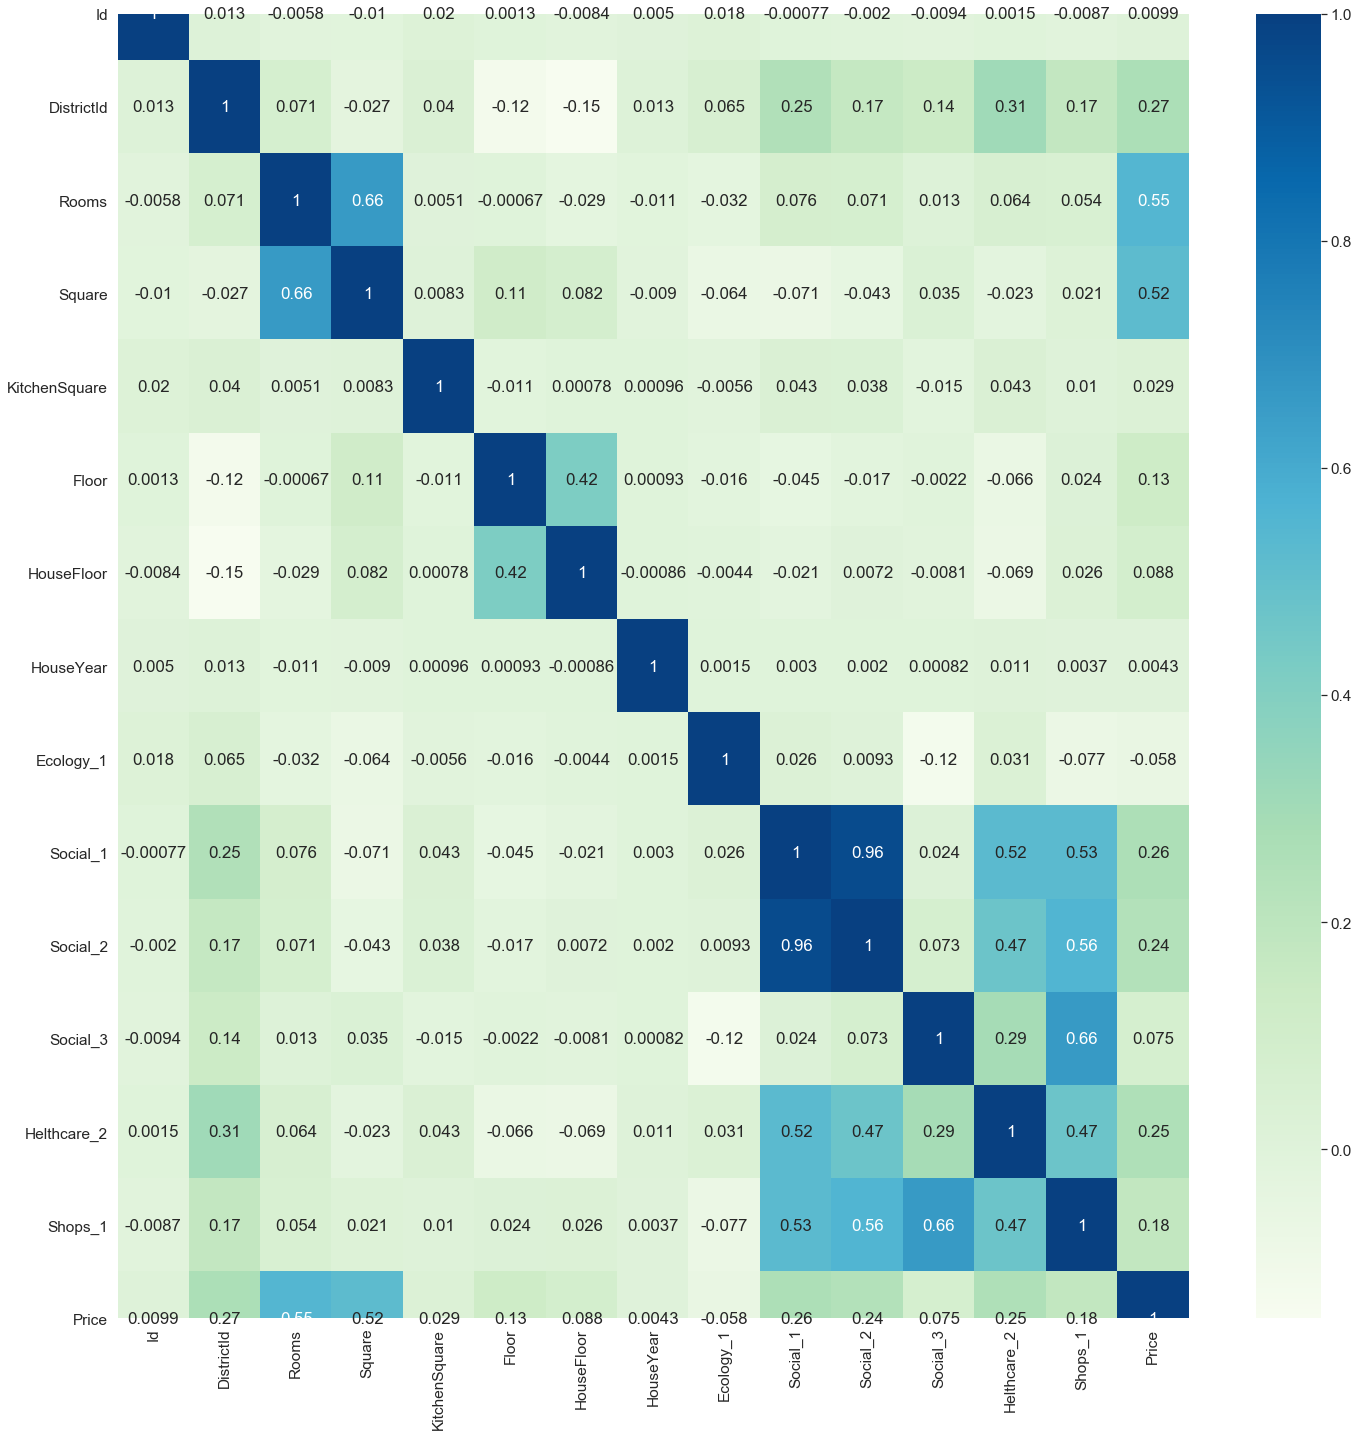

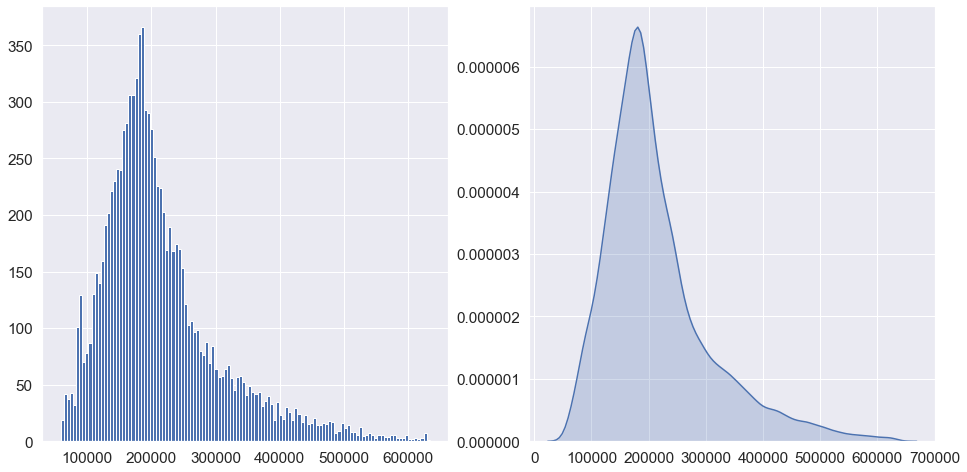

In [452]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

a = pd.read_csv('train.csv')
df0 = a.drop('Healthcare_1', axis=1)
df0 = df0.drop('LifeSquare', axis=1)

plt.figure(figsize=(24,24))
sns.set(font_scale=1.4)
sns.heatmap(df0.corr(),cmap='GnBu',annot=True)
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(121)
df0['Price'].hist(bins=120)
plt.subplot(122)
sns.kdeplot(df0['Price'],shade=True,legend=False)
plt.show()

In [453]:
#df0.loc[df0['KitchenSquare'] > df0.describe()['KitchenSquare']['75%']]  = df0['KitchenSquare'].median()
df0.info()
df0.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(6), int64(9), object(3)
memory usage: 1.4+ MB


,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,0,11,B,184966.930730
1,15053,41,3.0,65.683640,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,1,16,B,300009.450063
2,4765,53,2.0,44.947953,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,0,5,B,175616.227217
4,10783,99,1.0,39.649192,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2,4,B,150226.531644


In [454]:
df0.describe()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [455]:
#?np.random

In [456]:
print(df0.loc[df0['Rooms'] > 4, 'Rooms'].count())

22


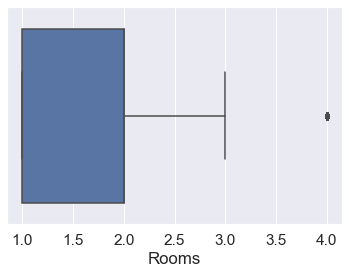

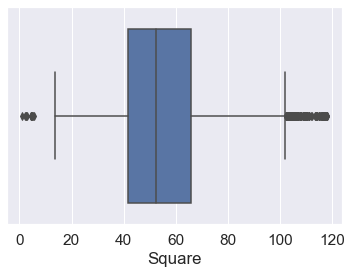

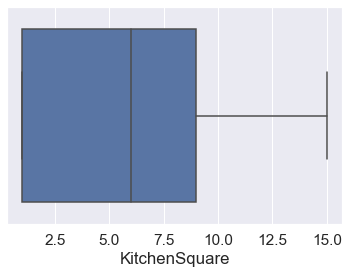

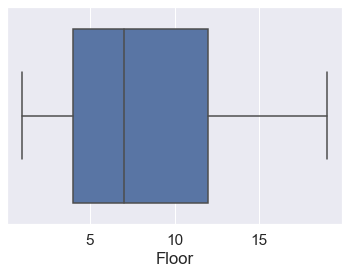

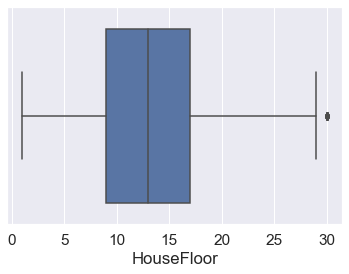

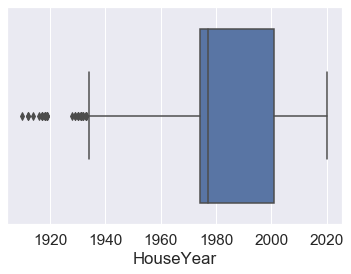

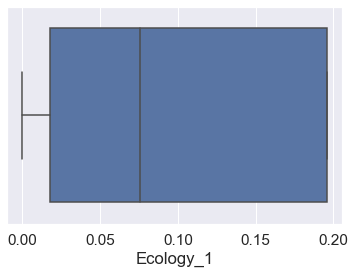

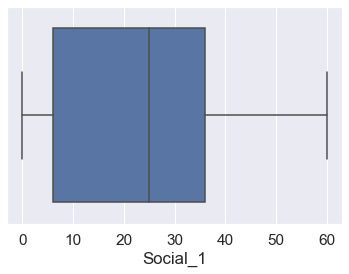

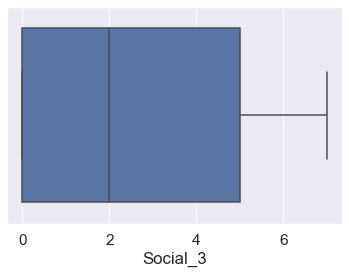

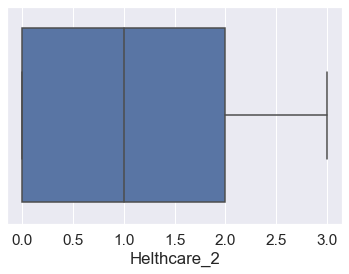

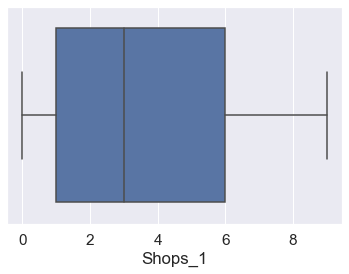

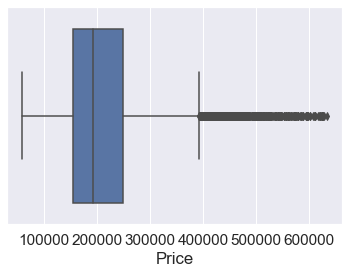

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,6.0,7,9.0,1969.0,0.089040,B,B,33,7976,5,0,6,B,184966.930730
1,15053,41,3.0,65.683640,8.0,7,9.0,1978.0,0.000070,B,B,46,10309,1,1,6,B,300009.450063
2,4765,53,2.0,44.947953,1.0,8,12.0,1968.0,0.049637,B,B,34,7759,0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,9.0,8,17.0,1977.0,0.195781,B,B,23,5735,3,0,5,B,175616.227217
4,10783,99,1.0,39.649192,7.0,11,12.0,1976.0,0.012339,B,B,35,5776,1,2,4,B,150226.531644


In [457]:
def unt75(colm):
    d75 = df0.describe()[colm]['75%']
    med = df0[colm].median()
    d25 = df0.describe()[colm]['25%']
    for i in range(0, len(df0)):
        if df0.at[i, colm] > d75 + med:
            df0.at[i, colm] = np.random.randint(d75, d75 + med)
    return df0[colm]

def unt25(colm):
    d25 = df0.describe()[colm]['25%']
    for i in range(0, len(df0)):
        if df0.at[i, colm] == 0:
            df0.at[i, colm] = d25
    return df0[colm]

unt75('Rooms')
unt75('Square')
unt75('KitchenSquare')
unt75('Floor')
unt75('HouseFloor')
#unt75('Ecology_1')
unt75('Social_1')
unt75('Social_3')
unt75('Helthcare_2')
unt75('Shops_1')

unt25('Rooms')
unt25('Square')
unt25('KitchenSquare')
unt25('Floor')
unt25('HouseFloor')

df0.loc[df0['Ecology_1'] > df0.describe()['Ecology_1']['75%'], 
        'Ecology_1'] = df0.describe()['Ecology_1']['75%']
df0.loc[df0['HouseYear'] > 2020, 'HouseYear'] = df0['HouseYear'].median()

sns.boxplot(df0['Rooms'])
plt.show()
sns.boxplot(df0['Square'])
plt.show()
sns.boxplot(df0['KitchenSquare'])
plt.show()
sns.boxplot(df0['Floor'])
plt.show()
sns.boxplot(df0['HouseFloor'])
plt.show()
sns.boxplot(df0['HouseYear'])
plt.show()
sns.boxplot(df0['Ecology_1'])
plt.show()
sns.boxplot(df0['Social_1'])
plt.show()
sns.boxplot(df0['Social_3'])
plt.show()
sns.boxplot(df0['Helthcare_2'])
plt.show()
sns.boxplot(df0['Shops_1'])
plt.show()
sns.boxplot(df0['Price'])
plt.show()

df0.describe()
df0.head()

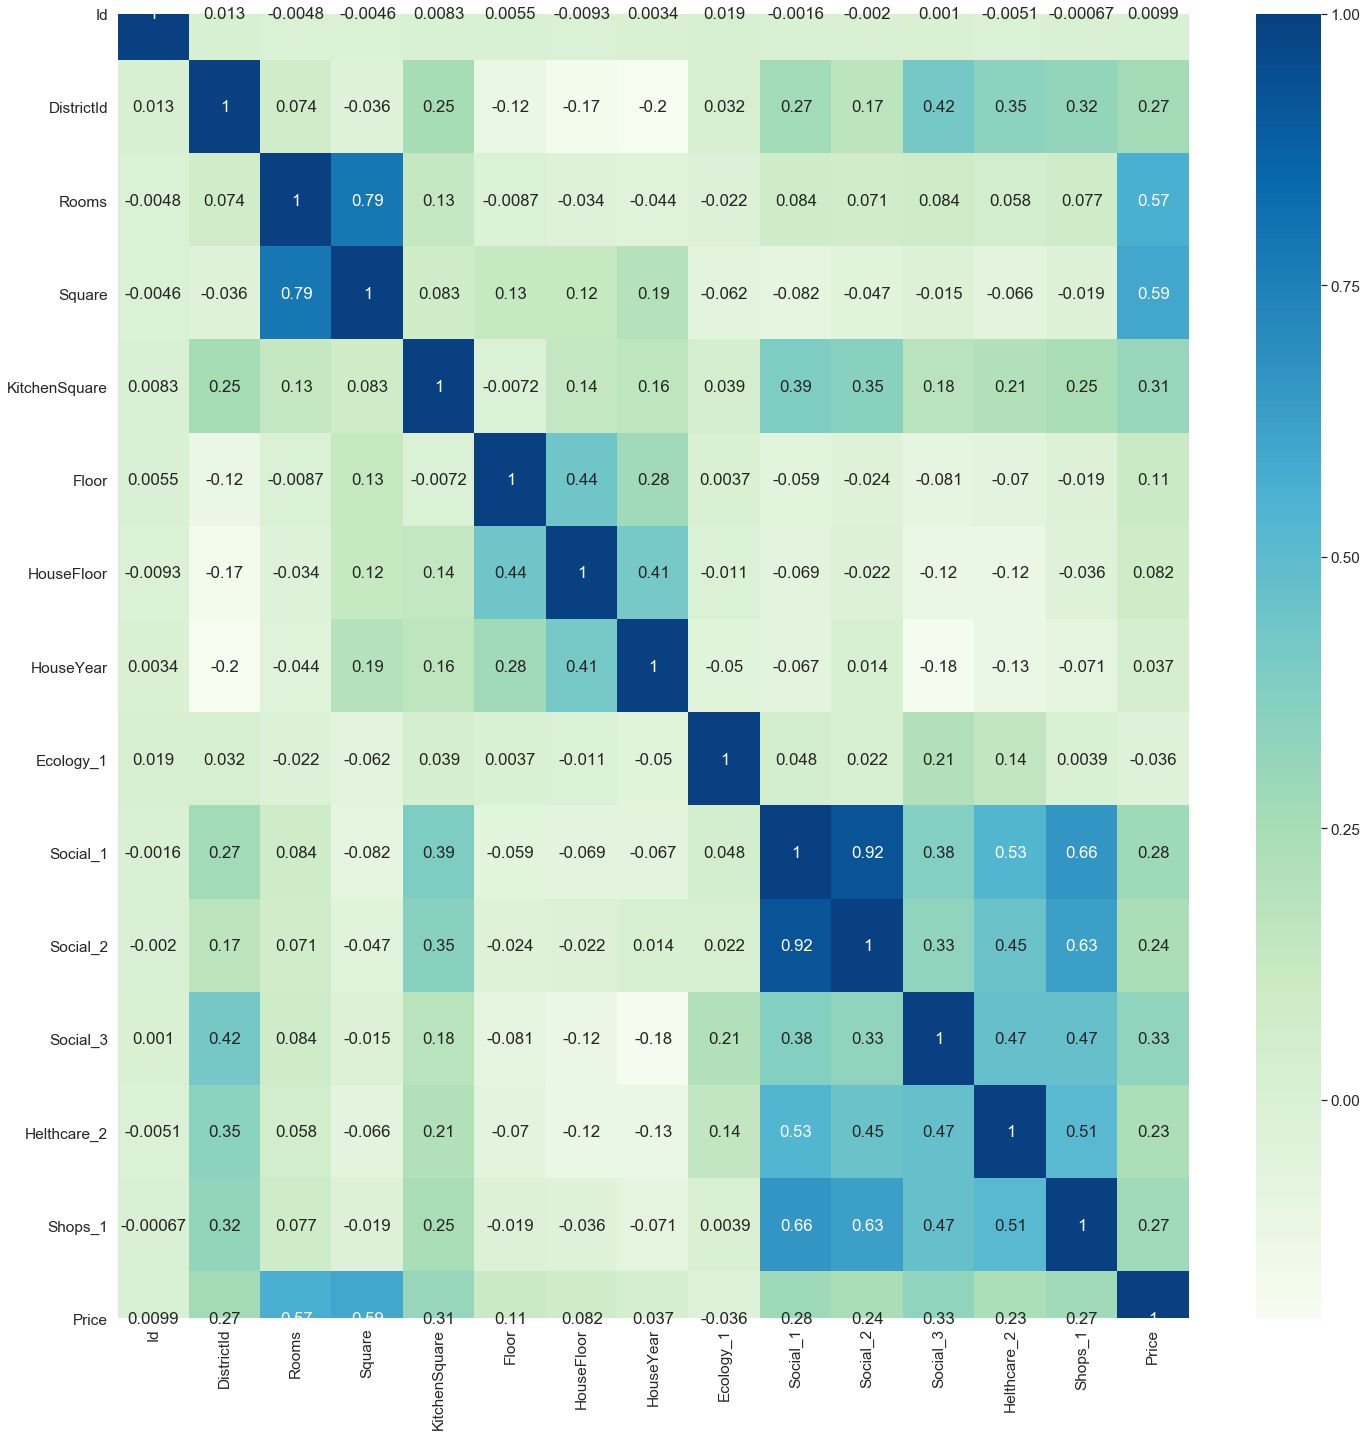

In [458]:
plt.figure(figsize=(24,24))
sns.set(font_scale=1.4)
sns.heatmap(df0.corr(),cmap='GnBu',annot=True)
plt.show()

In [459]:
y = pd.DataFrame(df0['Price'], columns=['Price'])

df = df0.drop('Price', axis=1)

def evaluate_preds(true_values,pred_values):
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=pred_values,y=true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

def ob2int(ob):
    dictob = dict([(i, char) for i, char in enumerate(set(df[ob]))])
    for i in range(0, len(df)):
        if df.at[i, ob] == dictob[0]:
            df.at[i, ob] = 0
        else:
            df.at[i, ob] = 1
    df[ob] = df[ob].astype('int')
    return df[ob]

ob2int('Ecology_2')
ob2int('Ecology_3')
ob2int('Shops_2')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null int32
Ecology_3        10000 non-null int32
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null int32
dtypes: float64(6), int32(3), int64(8)
memory usage: 1.2 MB


(3000, 17)
0.5763084285684413


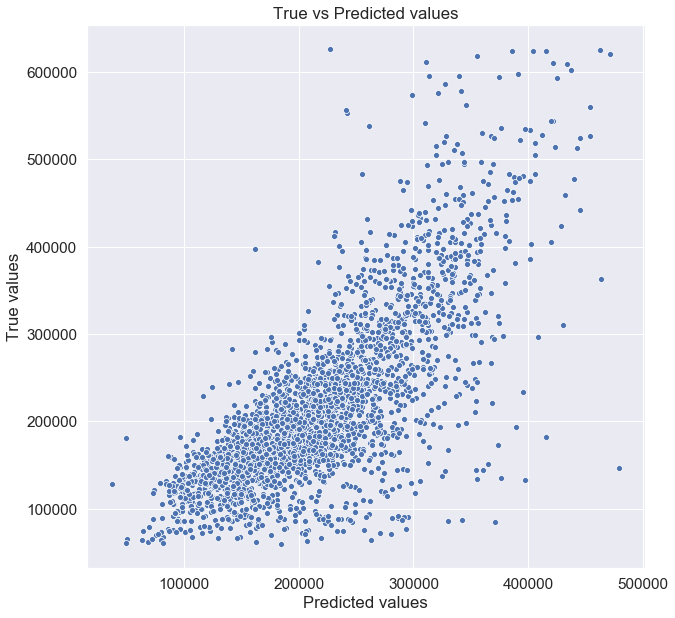

In [491]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()
x_train_nm = mmsc.fit_transform(df)

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(df)
x_train_sc = pd.DataFrame(x_train_sc, columns=df.columns)

x_train, x_test, y_train, y_test = train_test_split(x_train_sc, y, test_size=0.3, random_state=44)
lr = LinearRegression()
lr.fit(x_train_sc, y)

y_pr = lr.predict(x_test)
print(x_test.shape)
print(r2_score(y_test, y_pr))
evaluate_preds(y_test['Price'], y_pr[:, 0])

0.6365296930649084
0.6699011000690103


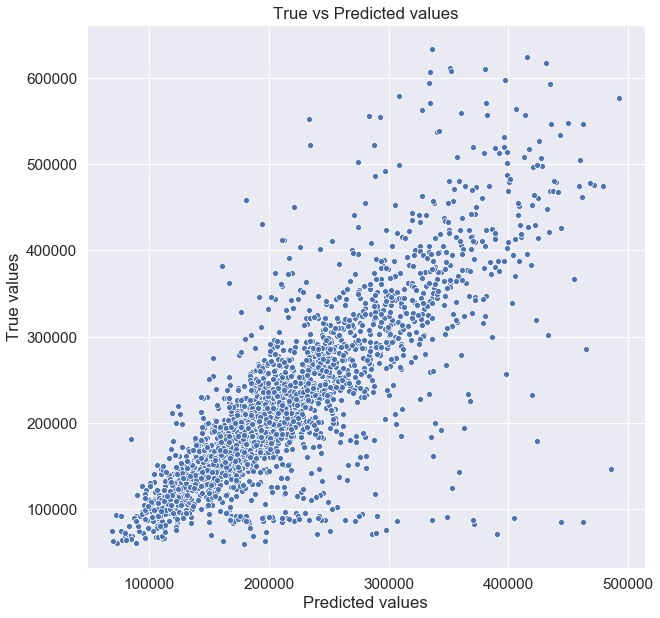

In [492]:
from sklearn.neighbors import KNeighborsRegressor

x_train, x_test, y_train, y_test = train_test_split(x_train_sc, y, test_size=0.3, random_state=42)
knr = KNeighborsRegressor(n_neighbors=12)
knr.fit(x_train, y_train)

y_pr = knr.predict(x_test)
print(r2_score(y_test, y_pr))
#evaluate_preds(y_test['Price'], y_pr[:, 0])
knr = KNeighborsRegressor(n_neighbors=12, weights='distance', algorithm='auto', leaf_size=30, p=1,
                              metric='minkowski', metric_params=None, n_jobs=-1)
knr.fit(x_train, y_train)
y_pr = knr.predict(x_test)
print(r2_score(y_test, y_pr))
evaluate_preds(y_test['Price'], y_pr[:, 0])

0.4124174340596407


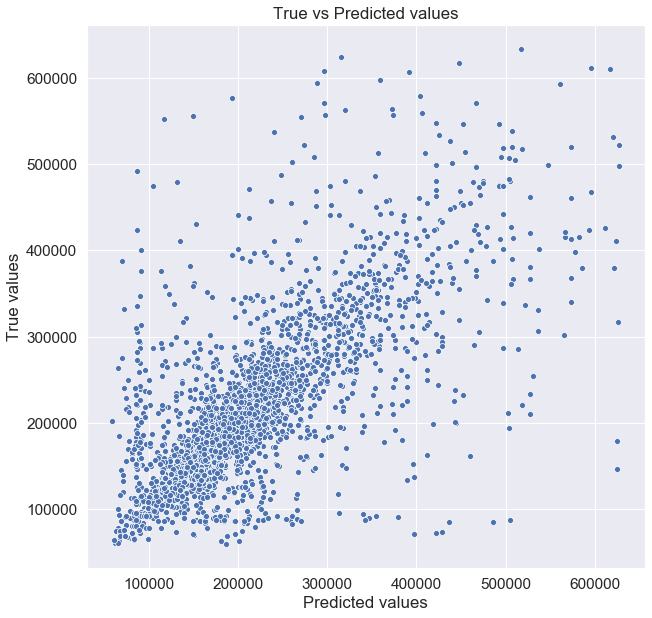

(3000,)

In [497]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

y_pr = dtr.predict(x_test)
print(r2_score(y_test, y_pr))
evaluate_preds(y_test['Price'], y_pr)
np.shape(y_test['Price'])

In [463]:
dft = pd.read_csv('test.csv')
dft.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [484]:
dft = pd.read_csv('test.csv')
dft = dft.drop('Healthcare_1', axis=1)
dft = dft.drop('LifeSquare', axis=1)
def ob2int(ob):
    dictob = dict([(i, char) for i, char in enumerate(set(dft[ob]))])
    for i in range(0, len(dft)):
        if dft.at[i, ob] == dictob[0]:
            dft.at[i, ob] = 0
        else:
            dft.at[i, ob] = 1
    dft[ob] = dft[ob].astype('int')
    return dft[ob]
ob2int('Ecology_2')
ob2int('Ecology_3')
ob2int('Shops_2')
dft.info()
x_test_sc = df
df.shape
x_test_sc = scaler.transform(dft)
y_test = knr.predict(x_test_sc)
out = pd.DataFrame(dft['Id'])
out['Price'] = y_test
out.to_csv('out.csv', index=False)
out.head()
#print(y_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int32
Ecology_3        5000 non-null int32
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null int32
dtypes: float64(5), int32(3), int64(9)
memory usage: 605.6 KB


,Id,Price
0,725,147299.192707
1,15856,209784.453676
2,5480,235560.406638
3,15664,283554.912270
4,14275,148718.527290


In [467]:
?KNeighborsRegressor